In [41]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
import numpy as np
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
from datetime import datetime
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff

In [55]:
n =  pd.read_csv("ships/SIEM PILOT.csv")
n = n [["TIMESTAMP","LAT","LON","HEADING"]]
def convert_timestamp(tmstmp):
    tmstmp = tmstmp.replace(',', '.')
    datetime_format = '%Y-%m-%d %H:%M:%S.%f'
    return datetime.strptime(tmstmp,datetime_format)
n["TIMESTAMP"] = n["TIMESTAMP"].apply(convert_timestamp)
n.sort_values('TIMESTAMP',inplace=True)
n=n.reset_index(drop=True)


In [78]:
real_data =  pd.read_csv("../data/route.csv")
real_data = real_data [["TIMESTAMP","LAT","LON","HEADING"]]
real_data.sort_values('TIMESTAMP',inplace=True)
real_data=real_data.reset_index(drop=True)
print(real_data)

               TIMESTAMP       LAT       LON  HEADING
0    2015-07-06 17:01:06  36.84425  18.63574       40
1    2015-07-06 17:03:16  36.84854  18.64025       40
2    2015-07-06 17:05:26  36.85295  18.64481       40
3    2015-07-06 17:07:46  36.85758  18.64959       40
4    2015-07-06 17:10:54  36.86391  18.65620       40
5    2015-07-06 17:14:05  36.87029  18.66285       40
6    2015-07-06 17:16:05  36.87435  18.66711       40
7    2015-07-06 17:18:16  36.87880  18.67172       40
8    2015-07-06 17:20:16  36.88279  18.67594       40
9    2015-07-06 17:22:24  36.88711  18.68032       40
10   2015-07-06 17:24:36  36.89158  18.68506       40
11   2015-07-06 17:27:45  36.89802  18.69173       40
12   2015-07-06 17:30:45  36.90414  18.69805       40
13   2015-07-06 17:33:45  36.91027  18.70437       40
14   2015-07-06 17:36:15  36.91541  18.70970       40
15   2015-07-06 17:38:16  36.91947  18.71390       40
16   2015-07-06 17:40:16  36.92361  18.71821       40
17   2015-07-06 17:42:16  36

In [79]:
start = real_data.iloc[0]["TIMESTAMP"]
end = real_data.iloc[-1]["TIMESTAMP"]

n['TIMESTAMP'] = pd.to_datetime(n['TIMESTAMP'])  
mask = (n['TIMESTAMP'] > start) & (n['TIMESTAMP'] <= end)
n_data = n[mask]
print(n_data)

               TIMESTAMP       LAT       LON  HEADING
2309 2015-07-06 17:03:16  36.84854  18.64025       40
2310 2015-07-06 17:05:26  36.85295  18.64481       40
2311 2015-07-06 17:07:46  36.85758  18.64959       40
2312 2015-07-06 17:10:54  36.86391  18.65620       40
2313 2015-07-06 17:14:05  36.87029  18.66285       40
2314 2015-07-06 17:16:05  36.87435  18.66711       40
2315 2015-07-06 17:18:16  36.87880  18.67172       40
2316 2015-07-06 17:20:16  36.88279  18.67594       40
2317 2015-07-06 17:22:24  36.88711  18.68032       40
2318 2015-07-06 17:24:36  36.89158  18.68506       40
2319 2015-07-06 17:27:45  36.89802  18.69173       40
2320 2015-07-06 17:30:45  36.90414  18.69805       40
2321 2015-07-06 17:33:45  36.91027  18.70437       40
2322 2015-07-06 17:36:15  36.91541  18.70970       40
2323 2015-07-06 17:38:16  36.91947  18.71390       40
2324 2015-07-06 17:40:16  36.92361  18.71821       40
2325 2015-07-06 17:42:16  36.92765  18.72241       40
2326 2015-07-06 17:44:16  36

In [8]:
# n_split = len(real_data)/train_test_options["split"]
# real_data = np.split(real_data, n_split)

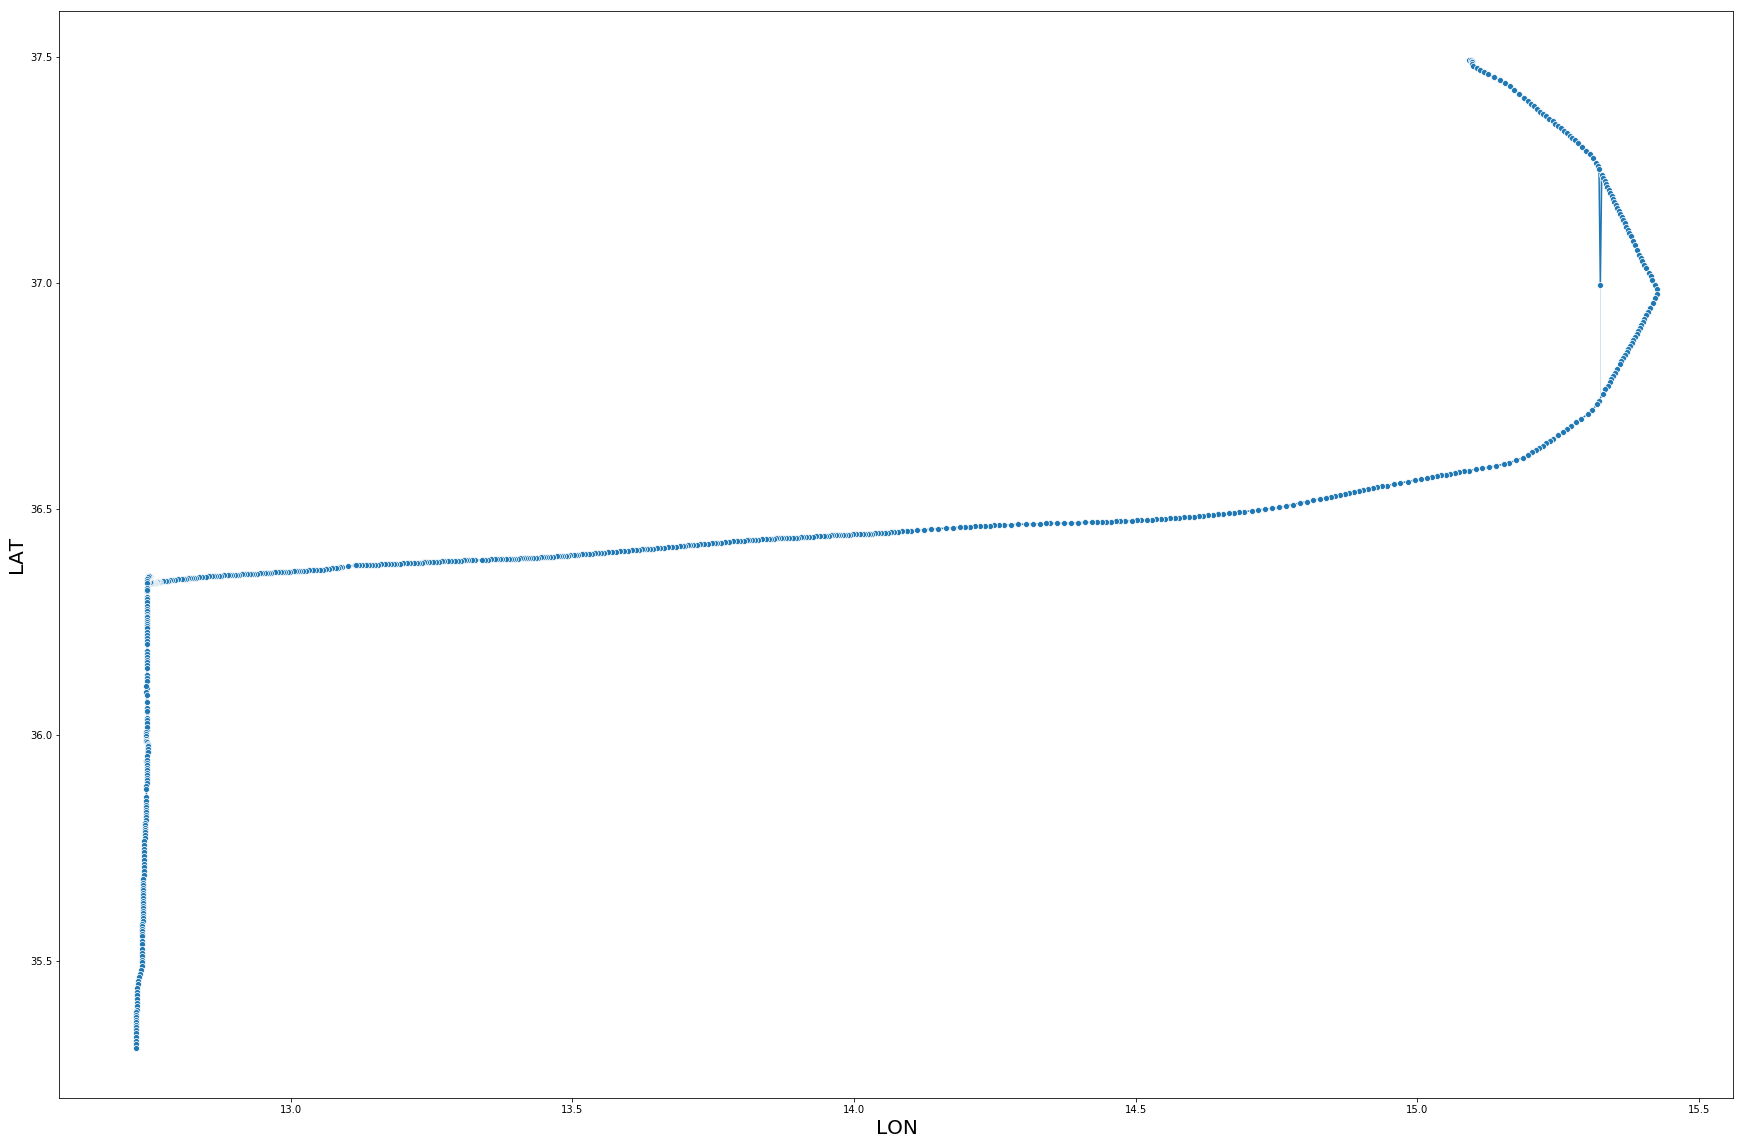

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
data=n
# Plot using Seaborn
sns.lineplot(x='LON', y='LAT', data=data.head(750), ax=ax,sort=False,marker="o")
